# <center> Econ 590: Quantitative Economics (with Python) </center>
## <center> Homework 6 </center>

In [1]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed
import numpy as np
import scipy.integrate as si
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
import datetime
import matplotlib.pylab as plt
import scipy as sp
import sympy as smp
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
%matplotlib inline

In [2]:
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd
# for example: %cd  "C:\\Users\\xinxi\\HW2\\\HW2_Data\\"
# Define your data folder here:
%cd "C:\\Users\\Public\\ddd\\jupterWork\\HW6_DATA\\"
datafolder = "C:\\Users\\Public\\ddd\\jupterWork\\HW6_DATA\\"
outputfolder = "C:\\Users\\Public\\ddd\\jupterWork\\HW6_Output\\"
# Please use an absolute path

C:\Users\Public\ddd\jupterWork\HW6_DATA


# Question 1

Consider the inverse demand curve is given by $p_d = 100e^{-q_d}$, write a function to determine the consumer surplus at any market price.

- **Input** : a market price
- **Output** : the consumer surplus

In [3]:
def q1(P_market):
    ''' function to determine the consumer surplus at any market price '''
    q = smp.symbols('q',real=True)                                                  # define the q variable 
    def Qu(p):
        ''' function to write the function of the quantity'''
        return -1* smp.log(P_market/100)                                            # return the quantity 
    def consum_sur():
        ''' function to write the function of consumer surplus and find the area'''
        f = 100 * smp.exp(-1*q)                                                     # define f
        area = smp.integrate(f,(q,0,Qu(P_market)))                                  # finding the area
        return (area - (P_market * Qu(P_market)))                                   # return consum surplus = area - (P*Q)
    return consum_sur()                                                             # retuning the consum surplus result

q1(.5)                                                                              # the out put of q1(at any market price)

96.8508413167260

# Question 2
Gini coefficient is a measure of inequality that compares the perfect equality and the
actual distribution. Specifically, Gini coefficient is obtained by using the Lorenz curve as
follows: calculate the ratio between the area under the [Lorenz Curve](https://en.wikipedia.org/wiki/Lorenz_curve#/media/File:Lorenz_curve_global_income_2011.svg) and the area under
the line of equality. 

Using the data "income_shares.csv" to calculate and plot the timeseries of Gini coefficient from 1967 until 2019. Based on your results, what can you say about the income inequality in the US in the last 50 years?

*Make sure "income_shares.csv" is in the data folder.

*Hint: see [here for an example](https://en.wikipedia.org/wiki/Gini_coefficient#/media/File:Economics_Gini_coefficient2.svg)*

- **Input** : none
- **Output** : 
    1. a pdf figure saved to file username_q2.pdf (saved to the output folder)
     - Make sure that your graph contains axis labels.
    2. print out your response to the question. 

Income inequality in the US has frequently gone up and down, but has overall been increasing steadily over the last 50 years.


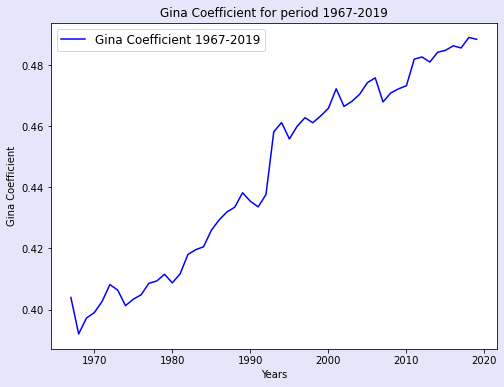

In [4]:
def q2(): 
    def linear_interpolation(x,x_grid,f_grid):
        '''function to approximate f(x) using linear interpolation'''
        #TO DO In Class
        
        #Step 1: Find the index of the closest value to x to the left of x    
        i = np.abs(x_grid-x).argmin()

        if x - x_grid[i]==0: #if the x of interest is already present in the x_grid
            return f_grid[i]

        if x - x_grid[i]>0: # if x of interest is to the right of the nearest number in the grid
            li = i
            ri = i+1
        else:               # if x of interest is to the left of the nearest number in the grid
            li=i-1
            ri=i
            
        #Step 2: Return value of f_grid for that index
        a = x_grid[li]
        fa = f_grid[li]
        b = x_grid[ri]
        fb = f_grid[ri]

        return fa + (fb-fa)*(x-a)/(b-a)    
    data = pd.read_csv(datafolder+'income_shares.csv', skiprows = range(0,1), index_col = 'Year') #read the csv folder, skip the title row and set the year as index
    df = data.iloc[0:53, :]                                                            #remove last two rows containing unwanted text
    df = df.sort_values(by='Year')                                                     # sort years ascendingly
    df['Highest\nfifth'] = df['Highest\nfifth'] - df['Top 5\npercent']                 # use top 5 data to have one more point
    df = df[['Lowest\nfifth','Second\nfifth', 'Third\nfifth', 'Fourth\nfifth', 'Highest\nfifth', 'Top 5\npercent']].cumsum(axis=1)  #obtain cumulative numbers
    df_new = df.T                                                                      # Transpose the data to view each year's data by column
    x_grid = np.array([20, 40, 60, 80, 95, 100])    
    A1 = []                                                                        #Create an empty list for area of region A
    B1 = []                                                                        #Create an empty list for area of region B

    for y in range(1967,2020):
        f_grid = df_new[str(y)].to_numpy()                                         #Create the f-grid for each year
        f2 = interp1d(x_grid, f_grid, kind='cubic')                                #approximate a function for each year
        B = si.quad(f2,20,100)[0]                                                  #obtain the area of B region for each year
        B1.append(B)                                                               #Add the obtained B areas to the list we created

    for i in range(53):
        A = (0.5*100*100) - B1[i]                                                  #Obtain the areas of A for each year
        A1.append(A)                                                               #Add the obtained areas of A to the list A1 we created 


    result = []                                                                    #An empty list to add the values of Gina coefficients
    for (A,B) in zip(A1,B1):
        gina_coef = A/(A+B)                                                        #An equation to get the Gina coefficient
        result.append(gina_coef)                                                   # add the obtained gina coefficients for each year in the result list

    year = list(range(1967,2020))                                                  # this is the list to be ploted on the x-axis of our plot
    fig, ax = plt.subplots(figsize=(8,6),facecolor="lavender")
    ax.plot(year, result, label='Gina Coefficient 1967-2019', color='blue')
    legend = ax.legend(fontsize='large')
    plt.xlabel('Years')
    plt.ylabel('Gina Coefficient')
    plt.title('Gina Coefficient for period 1967-2019')
    fig.savefig(outputfolder+'nkeshk_q2.pdf')
    
    print('Income inequality in the US has frequently gone up and down, but has overall been increasing steadily over the last 50 years.')
q2()

# Question 3 Utility maximization 


Consider a labor whose utility function is defined as $U=C^{0.3}L^{0.7}$, both the consumption (C) he spent and the hours of leisure (L) bring him utilities. Suppose this labor has 16 hours in total to spend between working and leisure. If he works, he will get 25 dollars per hour and will spend all his income on consumption. $C = 25*(16-L)$. 

Formulate the objective function and use exhaustive search to find the optimal hours of leisure he will enjoy.

- **Input** : none
- **Output** : print out the optimal hours of leisure and the max utility

Max utility at leisure hour = 11.183946488294314
Max utility is: 22.814237065573334


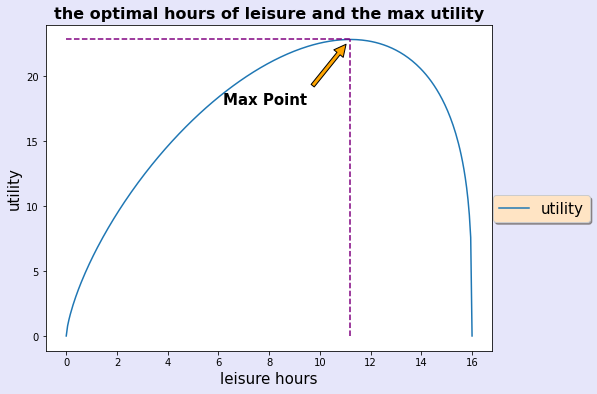

In [5]:
def q3():
    ''' function to the optimal hours of leisure and the max utility '''
    def ut(L):
        ''' function to finf the utility '''
        return L**0.7 * (25*(16-L))**0.3                                              # return the utility fuction
    L = np.linspace(0,16,300)                                                         # the line space
    utility = ut(L)
    iMax = utility.argmax()                                                           # get the index of the max hours
    fig, ax = plt.subplots(figsize=(8,6),facecolor="lavender")                        # plotting
    plt.plot(L,ut(L))                                                                 # plotting
    plt.vlines(x=L[iMax], ymin=0, ymax=utility[iMax], color='purple', linestyles='--')# vertical line 
    plt.hlines(y=utility[iMax], xmin=0, xmax=L[iMax], color='purple', linestyles='--')# horizontal line
    plt.xlabel('leisure hours',fontsize=15)                                           # label of x axis
    plt.ylabel('utility',fontsize=15)                                                 # label of y axis
    plt.legend(['utility'],loc='upper center', 
      fontsize=15,bbox_to_anchor=(1.11, 0.5), shadow=True, ncol=1,facecolor='bisque') # the legend work
    plt.title('the optimal hours of leisure and the max utility',fontsize=16,fontweight='bold') # label the title 
                                                                                       
    plt.annotate('Max Point', fontsize=15, fontweight='bold',                         # annotate at max Point and arrow
        xy=(L[iMax], utility[iMax]),xytext=(L[iMax]-5, utility[iMax]-5),arrowprops=dict(facecolor='orange', shrink=0.09))


    print("Max utility at leisure hour =",L[iMax])                                    # printing the max hours
    print("Max utility is:", utility[iMax])                                           # printing the max utility
    fig.savefig(outputfolder+'ahmed210_q3.pdf')

q3()                                                                                  # the output of q3()

# Question 4

Write a function to implement the secant algorithm and apply it to solve:

$$f(x)=e^x-x-2=0$$

- **Input**: none
- **Output**: the value of x

In [6]:
def q4(): 
    ''' function to implement the Secant's algorithm '''
    def Secant(f):
        ''' function to implement the Secant's algorithm '''
        eps=.00001                                              # the error
        x0= -5                                                  # start of the intervel
        x1= 5                                                   # end of the intervel
        x2 = x0 - ((f(x0)*(x1-x0))/(f(x1)-f(x0)))               # secant law
        while abs(x2-x1)>eps:                                   # while statement to stop at error
            x0=x1                                               # changing the values of x0, x1
            x1=x2
            x2 = x1 - ((f(x1)*(x1-x0))/(f(x1)-f(x0)))           # calculate the new value of x2
        return x2                                               # retuning x2 value 

    def f(q):
        ''' function to write the function '''
        return np.exp(q)-q-2                                    # returning the function
    return Secant(f)                                            # returning the result
    
q4()                                                            # the output of q4()

-1.8414056604419908

# Question 5
Consider the supply-demand economy with the inverse supply curve given by  $p_s = {\sqrt{q_s} }$ and the inverse demand curve given by $p_d = 100e^{-q_d}$. Furthermore, suppose there is a per-unit tax of \$2. 

Write a function to determine the consumer surplus, the producer surplus, the revenue, the deadweight loss.

*Hints: Start by visualizing the market and identifying the areas that need to be calculated. To find the areas you will first need to find several intersection points. To do this you may utilize any of the approaches for finding zeros discussed in the lecture. Also, you may use any of the approaches for numerical integration to find the areas.*

- **Input**: none
- **Output**: 
    1. print out the values of the consumer surplus, the producer surplus, the revenue, the deadweight loss.
    2. a pdf figure saved to file username_q5.pdf (saved to the output folder)
        - Make sure that your graph contains axis labels and proper legends


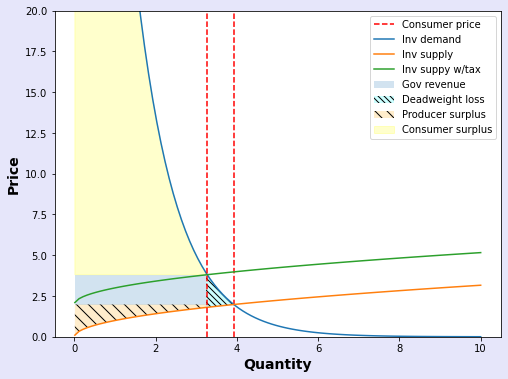

consumer surplus: 83.7479
producer surplus: 2.5334
government revenue: 5.9722
deadweight loss: 0.5327


In [7]:
def q5():
    ''' function to print out the values of the consumer surplus, the producer surplus, the revenue, the deadweight loss. '''
    def Pd(x): # function to return demand
        return 100 * np.exp(-x)
    
    def Ps(x): # function to return supply
        return np.sqrt(x)
    
    def Ps2(x): # function to return supply with per-unit tax
        return Ps(x) + 2
    
    def XIntersection(Pd,Ps,x0): # function to return the x value of the intersection point of two curves
        return fsolve(lambda x : Pd(x) - Ps(x),x0)
    fig, ax = plt.subplots(figsize=(8,6),facecolor="lavender")                        # plotting
    result1 = XIntersection(Pd,Ps,0.0) # intersection of inv demand curve and inv supply curve
    ax.axvline(result1, c='r', ls='--', label='Consumer price')
    Q = np.linspace(.01, 10, 100)
    Pd_fun = 100 * np.exp(-Q)
    plt.plot(Q, Pd_fun, label='Inv demand') # plotting inverse demand curve
    Ps_fun = np.sqrt(Q)
    plt.plot(Q, Ps_fun, label='Inv supply') # plotting inverse supply curve
    plt.ylim(0,20)
    Ps2_fun = Ps_fun + 2 
    plt.plot(Q, Ps2_fun, label='Inv suppy w/tax') # plotting inverse supply curve plus per-unit tax
    
    result2 = XIntersection(Pd,Ps2,0.0) # intersection of inv demand curve adn inv supply curve with per-unit tax
    ax.axvline(result2, c='r', ls='--')
    
    ax.fill_between(Q, Ps(result1), Ps2(result2), where=Q<=result2, alpha=.2, label='Gov revenue') # indicate on graph what gov revenue is
    ax.fill_between(Q, Pd(Q), Ps(Q), where=(Pd(Q)>Ps(Q)) & (Pd(Q)<=result1), interpolate=True, hatch='\\\\\\\\', facecolor='cyan', alpha=.2, label='Deadweight loss') # indicate on graph what deadweight loss is
    ax.fill_between(Q, Ps(result1), Ps(Q), where=Q<result2, alpha=.2, label='Producer surplus',hatch='\\\\', facecolor='orange') # indicate on graph what producer surplus is
    ax.fill_between(Q, Pd(Q), Ps2(result2), where=Q<result2, alpha=.2, color='yellow', label='Consumer surplus') # indicate on graph what consumer surplus is
    
    plt.xlabel('Quantity',fontsize=14,fontweight='bold')
    plt.ylabel('Price',fontsize=14,fontweight='bold')
    plt.legend(loc='upper right')
    plt.show()
    
    consum_sur = si.quad(Pd, 0, result2) - (result2 * Ps2(result2)) # calculate consumer surplus
    producer_sur = (Ps(result1) * result2) - si.quad(Ps, 0, result2) # calculate producer surplus
    gov_revenue = (result2 * Ps2(result2)) - (Ps(result1) * result2) # calculate government revenue
    dead = si.quad(Pd, result2, result1) - (Ps(result1) * (result1-result2)) # calculate deadweight loss
    
    # printing the results
    print("consumer surplus:",float('{:2.4f}'.format(consum_sur[0]))) 
    print("producer surplus:",float('{:2.4f}'.format(producer_sur[0])))
    print("government revenue:",float('{:2.4f}'.format(gov_revenue[0])))
    print("deadweight loss:",float('{:2.4f}'.format(dead[0])))
    
    fig.savefig(outputfolder+'mart2336_q5.pdf') # saving to the PDF
    
q5()

# Question 6 

Consider the partnership in which the firm's profit depends on the effort that each
partner expands on the job. Suppose that partner 1 chooses the effort level $x$ and partner
2 chooses the effort level $y$, and that profit of the partnership is
$$profit=4(x+y+0.1 x y)$$
The profit is shared equally between the two partners. Partner 1 incurs cost 
$c(x) = x^2$; Partner 2 incurs cost $c(y)=y^2$. Assume that $x$ and $y$ are between 0 and 4. 

Given that $BR_1(y) = 1 + 0.1 y$ and $BR_2(x) = 1 + 0.1 x$, solve for the Nash equilibrium of this
game using the fixed-point approach.

- **Input**: none
- **Output**: the value of x

In [8]:
def q6():
    ''' function to solve for the Nash equilibrium of this game using the fixed-point approach. '''
    eps = .000001 #specify the convergence criteria

    #Step 1: initial guess x0
    x0=0

    #Step 2: compute x1 by applying the function
    def BR(q): #this is our function of interest
        return 1+0.1*q

    x1 = BR(x0) #new guess

    #Step 3: iterate

    while abs(x1-x0)>eps:
        x0=x1
        x1=BR(x0)
    print(x1)
    
q6()

1.111111
